In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
#import needed libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error


In [3]:
#import the data
data = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

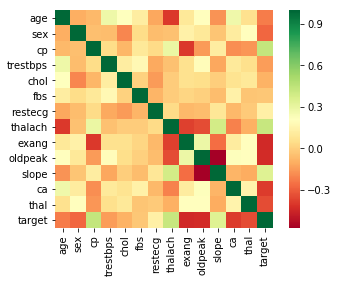

In [6]:
sns.heatmap(data.corr(),cmap='RdYlGn', square=True)

In [7]:
#split data between test and train
x = data.drop('target', axis=1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 17)
print(x_train.shape)

print(y_train.shape)

(212, 13)
(212,)


In [8]:
print(x_train.head(3))
print(y_train.head())

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
99    53    1   2       130   246    1        0      173      0      0.0   
40    51    0   2       140   308    0        0      142      0      1.5   
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  
99       2   3     2  
40       2   1     2  
164      2   4     2  
99     1
40     1
164    1
261    0
27     1
Name: target, dtype: int64


In [9]:
logreg = LogisticRegression()
grid = {"C":np.logspace(-5,5,12), "penalty":["l1","l2"]}
logreg_cv = GridSearchCV(logreg, grid, cv = 10)
logreg_cv.fit(x_test, y_test)



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 8.11130831e-05, 6.57933225e-04, 5.33669923e-03,
       4.32876128e-02, 3.51119173e-01, 2.84803587e+00, 2.31012970e+01,
       1.87381742e+02, 1.51991108e+03, 1.23284674e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=Tr

In [10]:
print('The best parameter set is: {}'.format(logreg_cv.best_params_))
print('The score is : {}'.format(logreg_cv.best_score_))

The best parameter set is: {'C': 23.10129700083158, 'penalty': 'l1'}
The score is : 0.8681318681318682


In [11]:
y_pred = logreg_cv.predict(x_test)
r2 = logreg_cv.score(x_test, y_test)
mse = mean_squared_error(y_test, y_pred)

In [12]:
print('The r2 score is: {}'.format(r2))
print('The mean squared error is: {}'.format(mse))

The r2 score is: 0.9230769230769231
The mean squared error is: 0.07692307692307693


In [13]:
logreg2 = logreg_cv.best_estimator_

In [14]:
print('The logistic coefficents are: {}'.format(list(zip(x_test.columns, logreg2.coef_.tolist()[0]))))
print('The logistic intercept is: {}'.format(logreg2.intercept_))

The logistic coefficents are: [('age', -0.10971625172359915), ('sex', -4.828817838620189), ('cp', 1.7432592580272823), ('trestbps', -0.05181584679554772), ('chol', -0.0043157280752334605), ('fbs', -0.1342397851577735), ('restecg', 1.1813432464311187), ('thalach', 0.09947347320405793), ('exang', -0.0684298085622685), ('oldpeak', -0.7683137710822071), ('slope', 2.775057346497147), ('ca', -1.5695709246352034), ('thal', -1.5998823123400487)]
The logistic intercept is: [1.04365225]


The model will need some modification. A red flag arises from the fact that age is negatively correlated with heart disease (e.g. youth is an indicator of heart disease).